<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/Building_My_Own_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Define linear regression model

class LinearRegression(tf.keras.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

In [0]:
# Creating a dataset
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

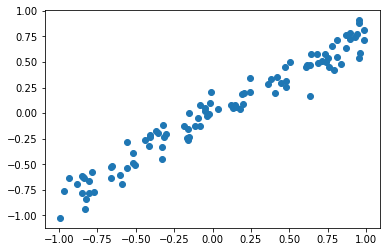

In [5]:
plt.scatter(X, Y)

In [0]:
# Cast type, otherwise Tensorflow will complain

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [0]:
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [0]:
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    # calculate the loss
    loss_value = get_loss(model, inputs, targets)
  
  # return gradient
  return tape.gradient(loss_value, model.params)

In [9]:
# Create and train the model
model = LinearRegression(D, K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.00144231]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [0]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model, X, Y)
  
  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))
  
  # Store the loss
  loss = get_loss(model, X, Y)
  losses.append(loss)

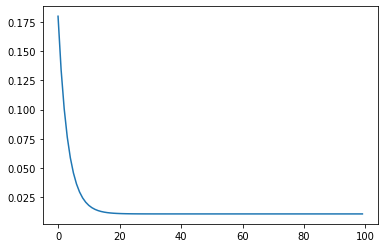

In [11]:
plt.plot(losses)

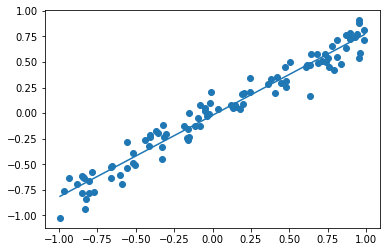

In [12]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

In [13]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.7983099]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.02069485], dtype=float32)>


In [14]:
print("True params:")
w, b

True params:


(array([[0.82714316]]), -0.03361348198458491)